In [23]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
totalMain = pd.read_pickle("clean_main.df")

In [24]:
a = []
for i in range(len(totalMain)):
    a.append(totalMain["date"][i].year)
years = np.unique(a)

Timestamp('2005-08-28 00:00:00')

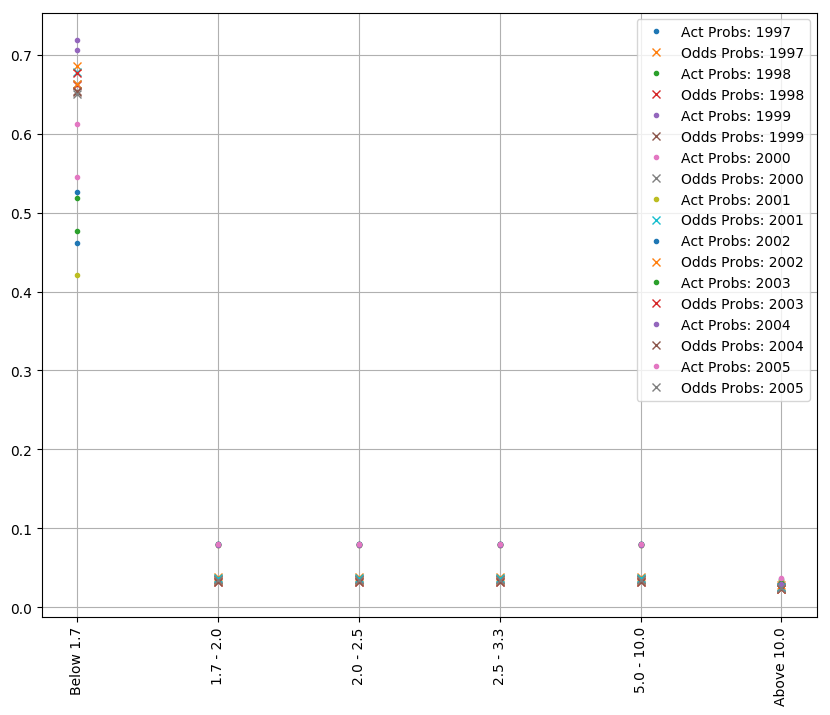

In [50]:
plt.figure(figsize=(10,8), dpi=100)
for year in years:
    main = totalMain.loc[totalMain['date'].dt.year == year]
    main1 = main.loc[main.win_odds < 1.7]
    main2 = main.loc[(main.win_odds >= 1.7) | (main.win_odds < 2.0)]
    main3 = main.loc[(main.win_odds >= 2.0) | (main.win_odds < 2.5)]
    main4 = main.loc[(main.win_odds >= 2.5) | (main.win_odds < 3.3)]
    main5 = main.loc[(main.win_odds >= 5.0) | (main.win_odds < 10.0)]
    main6 = main.loc[main.win_odds >= 10.0]
    
    avg1 = sum(main1.won)/len(main1)
    avg2 = sum(main2.won)/len(main2)
    avg3 = sum(main3.won)/len(main3)
    avg4 = sum(main4.won)/len(main4)
    avg5 = sum(main5.won)/len(main5)
    avg6 = sum(main6.won)/len(main6)
    avg = [avg1, avg2, avg3, avg4, avg5, avg6]
    
    oddsAvg1 = main1.win_odds.mean()
    oddsAvg2 = main2.win_odds.mean()
    oddsAvg3 = main3.win_odds.mean()
    oddsAvg4 = main4.win_odds.mean()
    oddsAvg5 = main5.win_odds.mean()
    oddsAvg6 = main6.win_odds.mean()
    oddsAvg = [oddsAvg1, oddsAvg2, oddsAvg3, oddsAvg4, oddsAvg5, oddsAvg6]
    
    impliedProb1 = oddsAvg1**-1
    impliedProb2 = oddsAvg2**-1
    impliedProb3 = oddsAvg3**-1
    impliedProb4 = oddsAvg4**-1
    impliedProb5 = oddsAvg5**-1
    impliedProb6 = oddsAvg6**-1
    impliedProb = [impliedProb1, impliedProb2, impliedProb3, impliedProb4, impliedProb5, impliedProb6]
    
    actOverImplied1 = avg1/impliedProb1
    actOverImplied2 = avg2/impliedProb2
    actOverImplied3 = avg3/impliedProb3
    actOverImplied4 = avg4/impliedProb4
    actOverImplied5 = avg5/impliedProb5
    actOverImplied6 = avg6/impliedProb6
    actOverImplied = [actOverImplied1, actOverImplied2, actOverImplied3, actOverImplied4, actOverImplied5, actOverImplied6]
    
    x = range(6)
    xNames = ["Below 1.7", "1.7 - 2.0", "2.0 - 2.5", "2.5 - 3.3", "5.0 - 10.0", "Above 10.0"]
    
    plt.plot(x, avg, ".", label="Act Probs: " + str(year))
#     plt.title("Average Win Percent")
#     plt.ylabel("Actual Win Percent")

#     plt.plot(x, actOverImplied, ".", label=str(year))
    plt.plot(x, impliedProb, "x", label="Odds Probs: " + str(year))


    
    plt.xticks(x, xNames, rotation=90)
    plt.grid()
    plt.legend()
    
plt.show()
    

In [32]:
fig1 = plt.figure()
fig2 = plt.figure()

fig1.plot([1,2])

AttributeError: 'Figure' object has no attribute 'plot'

In [21]:
main.loc[main["date"].dt.year == 2000]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,last_last_sec_speed_ratio,avg_speed_rating_ratio,last_speed_rating_ratio,last_last_sec_speed_rating,avg_sec1_speed_rating_rel,last_sec1_speed_rating_rel,avg_last_sec_speed_rating_rel,last_last_sec_speed_rating_rel,avg_speed_rating_ratio_rel,last_speed_rating_ratio_rel
24084,2020,1,675,11,0,6.25,3,AUS,Gelding,60,...,74.663824,0.733131,0.828126,74.663824,-1.253868,-0.685566,1.702792,-0.225272,-0.377208,-0.453200
24085,2020,2,588,12,0,6.75,3,AUS,Gelding,60,...,75.440476,11.490997,1.000019,75.440476,1.119682,0.104649,0.146370,-0.183635,3.104429,-0.007532
24086,2020,3,2485,7,0,4.00,3,NZ,Gelding,60,...,65.459864,3.896384,1.429623,65.459864,1.664999,1.157875,-2.392756,-0.718707,0.646536,1.106306
24087,2020,4,1868,5,0,3.50,3,AUS,Gelding,60,...,99.203779,1.349569,0.531053,99.203779,-0.647928,-1.216713,0.388588,1.090342,-0.177706,-1.223425
24088,2020,5,3947,1,1,0.00,3,NZ,Gelding,60,...,107.585451,-0.209784,0.701399,107.585451,0.754213,0.105716,-0.614950,1.539693,-0.682370,-0.781768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33149,2780,8,2666,11,0,7.00,3,NZ,Gelding,60,...,96.306279,1.500858,0.764509,96.306279,-0.972166,-0.445280,0.205539,0.311459,1.475644,0.021671
33150,2780,9,330,12,0,7.25,3,AUS,Gelding,60,...,90.561861,1.009876,0.552866,90.561861,0.087054,-1.826456,0.233534,0.192501,0.245793,-0.128770
33151,2780,10,3997,9,0,3.25,3,GB,Gelding,60,...,126.928444,0.705702,0.517825,126.928444,-1.160266,-0.908452,0.880129,0.945594,-0.516126,-0.153678
33152,2780,11,3812,3,0,0.50,4,IRE,Gelding,72,...,100.956313,1.226350,0.740824,100.956313,0.265379,-0.377044,-0.247733,0.407753,0.788035,0.004835
